https://moviecultists.com/do-you-need-to-normalize-variables-for-logistic-regression

https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [91]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [92]:
heart = pd.read_csv("SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [93]:
heart.famhist.replace(to_replace=['Present', 'Absent'], value=[1, 0], inplace=True)
heart.drop(['row.names'], axis=1, inplace=True)
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [94]:
Xa = heart[['age','ldl']]
Xa

,age,ldl
0,52,5.73
1,63,4.41
2,46,3.48
3,58,6.41
4,49,3.50
...,...,...
457,58,5.98
458,52,4.41
459,55,1.59
460,40,11.61


In [95]:
ya = heart.chd
ya

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.33, random_state=42)

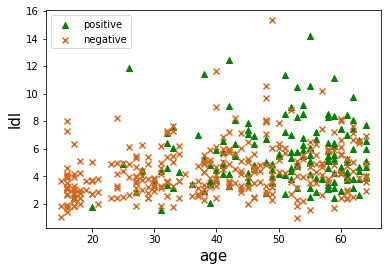

In [97]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [100]:
logreg.fit(Xa_train, ya_train)
ya_pred = logreg.predict(X_test)

In [101]:
ya_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

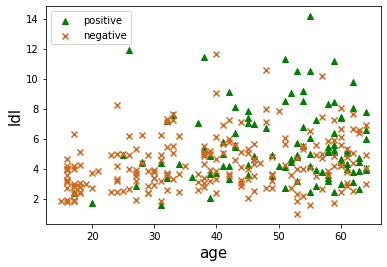

In [102]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

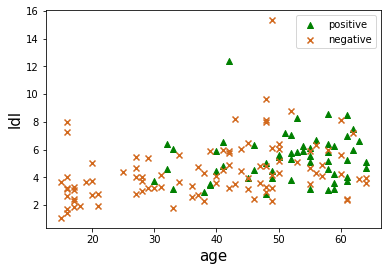

In [103]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

In [104]:
logreg.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([22]),
 'coef_': array([[0.05234073, 0.21692807]]),
 'intercept_': array([-4.09112497])}

In [105]:
_xa = np.linspace(14.0, 65.0, num=41)
_xa

array([14.   , 15.275, 16.55 , 17.825, 19.1  , 20.375, 21.65 , 22.925,
       24.2  , 25.475, 26.75 , 28.025, 29.3  , 30.575, 31.85 , 33.125,
       34.4  , 35.675, 36.95 , 38.225, 39.5  , 40.775, 42.05 , 43.325,
       44.6  , 45.875, 47.15 , 48.425, 49.7  , 50.975, 52.25 , 53.525,
       54.8  , 56.075, 57.35 , 58.625, 59.9  , 61.175, 62.45 , 63.725,
       65.   ])

In [106]:
_ya = (logreg.__dict__['intercept_'] * (-1.0) - logreg.__dict__['coef_'][0][0] * _x ) \
    / logreg.__dict__['coef_'][0][1]

In [107]:
_ya

array([15.48142088, 15.17378693, 14.86615299, 14.55851904, 14.2508851 ,
       13.94325115, 13.63561721, 13.32798326, 13.02034932, 12.71271537,
       12.40508143, 12.09744748, 11.78981354, 11.48217959, 11.17454565,
       10.8669117 , 10.55927776, 10.25164381,  9.94400987,  9.63637592,
        9.32874198,  9.02110803,  8.71347409,  8.40584014,  8.0982062 ,
        7.79057225,  7.48293831,  7.17530436,  6.86767042,  6.56003647,
        6.25240253,  5.94476858,  5.63713464,  5.32950069,  5.02186675,
        4.71423281,  4.40659886,  4.09896492,  3.79133097,  3.48369703,
        3.17606308])

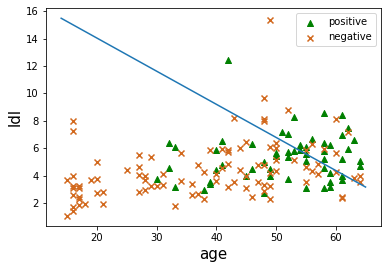

In [108]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

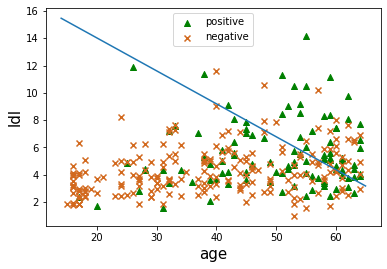

In [109]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

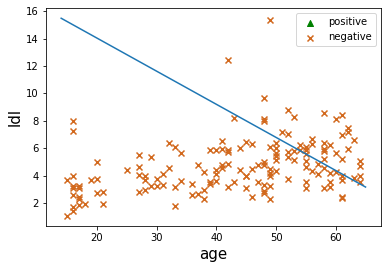

In [110]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_pred==1]["age"],Xa_test[ya_pred==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_pred==0]["age"],Xa_test[ya_pred==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()

In [111]:
perf = sklearn.metrics.confusion_matrix(ya_test, ya_pred)
print(perf)
err_logreg = np.mean(ya_test != ya_pred)
print(err_logreg)
print(1 - sum(np.diag(perf)) / float(len(ya_test)))
assert(np.round(err_logreg, 5) == 
       np.round(1 - sum(np.diag(perf)) / float(len(ya_test)), 5))

[[97  0]
 [56  0]]
0.3660130718954248
0.36601307189542487


https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [112]:
from sklearn import preprocessing

In [113]:
Xb = heart[['age','ldl']]
Xb

,age,ldl
0,52,5.73
1,63,4.41
2,46,3.48
3,58,6.41
4,49,3.50
...,...,...
457,58,5.98
458,52,4.41
459,55,1.59
460,40,11.61


In [114]:
yb = heart.iloc[:, -1]
yb

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [115]:
scaler = preprocessing.StandardScaler().fit(Xb)

In [116]:
Xb_scaled = scaler.transform(Xb)

In [117]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 2,
 'n_samples_seen_': 462,
 'mean_': array([42.81601732,  4.74032468]),
 'var_': array([212.95965687,   4.27938193]),
 'scale_': array([14.59313732,  2.0686667 ])}

In [118]:
Xb_scaled

array([[ 6.29335727e-01,  4.78412169e-01],
       [ 1.38311470e+00, -1.59679988e-01],
       [ 2.18183562e-01, -6.09244918e-01],
       [ 1.04048789e+00,  8.07126311e-01],
       [ 4.23759645e-01, -5.99576855e-01],
       [ 1.49658201e-01,  8.36130500e-01],
       [-3.30019324e-01, -6.57585233e-01],
       [ 1.04048789e+00, -7.26674215e-02],
       [-9.46747571e-01, -4.40053815e-01],
       [ 6.97861088e-01,  5.12250390e-01],
       [ 1.17753861e+00, -8.65448587e-01],
       [-1.92968603e-01, -1.45177894e-01],
       [-1.76905190e+00, -1.38268996e+00],
       [-1.90610262e+00, -1.38752399e+00],
       [ 6.97861088e-01, -1.18449467e+00],
       [ 2.18183562e-01, -1.11198419e+00],
       [ 4.23759645e-01,  5.11908241e+00],
       [ 6.97861088e-01,  1.71592423e+00],
       [ 1.31458933e+00,  1.31469962e+00],
       [ 1.10901325e+00,  7.20113744e-01],
       [-1.56347582e+00, -1.45036640e+00],
       [ 8.11328406e-02, -9.13788902e-01],
       [ 4.92285005e-01,  7.92624216e-01],
       [ 1.

In [119]:
Xb_scaled.mean(axis=0)

array([-9.61232056e-18,  3.42198612e-16])

In [120]:
Xb_scaled.std(axis=0)

array([1., 1.])

In [121]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_scaled, yb, test_size=0.33, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(Xb_train, yb_train)
yb_pred = logreg.predict(Xb_test)
print(yb_pred)
print(logreg.__dict__)
perf = sklearn.metrics.confusion_matrix(yb_test, yb_pred)
print(perf)
err_logreg = np.mean(yb_test != yb_pred)
print(err_logreg)
print(1 - sum(np.diag(perf)) / float(len(yb_test)))
assert(np.round(err_logreg, 5) == 
       np.round(1 - sum(np.diag(perf)) / float(len(yb_test)), 5))

[0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 1]
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'lbfgs', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None, 'n_features_in_': 2, 'classes_': array([0, 1], dtype=int64), 'n_iter_': array([6]), 'coef_': array([[0.74748756, 0.44447108]]), 'intercept_': array([-0.81664493])}
[[83 14]
 [35 21]]
0.3202614379084967
0.3202614379084967


In [122]:
beta = np.zeros(2)
beta[0]=0.49555755
beta[1]=0.49758905
alpha= -0.3306306